# argo_seasonality

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

In [2]:
import filt_funcs as ff
import EKE_funcs as ef

In [14]:
so_ds=xr.open_dataset("202206_lon:(25,45)_lat:(-60,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)
so_param = [25,45,-60,-50]

(array([32., 29., 30., 33., 35., 28., 29., 21., 22., 18., 25., 33.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

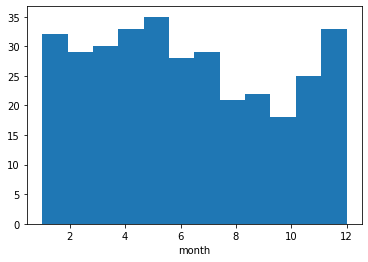

In [15]:
so.TIME.dt.month.plot.hist(bins=12)

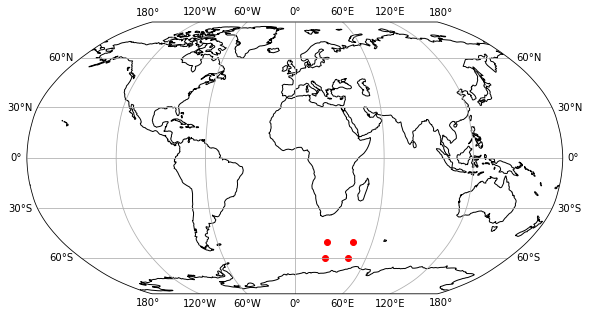

In [18]:
plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.plot(so_param[0],so_param[2],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[0],so_param[3],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[1],so_param[2],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[1],so_param[3],transform=ccrs.PlateCarree(),marker='o',color='r')

Want:

- Group 1: months 1,2,3 (Jan,Feb,Mar)
- Group 2: months 4,5,6 (Apr,May,Jun)
- Group 3: months 7,8,9 (Jul,Aug,Sep)
- Group 4: months 10,11,12 (Oct,Nov,Dec)

In [20]:
so1 = so.TIME.dt.month.where(so.TIME.dt.month>0).where(so.TIME.dt.month<4)
so2 = so.TIME.dt.month.where(so.TIME.dt.month>3).where(so.TIME.dt.month<7)
so3 = so.TIME.dt.month.where(so.TIME.dt.month>6).where(so.TIME.dt.month<10)
so4 = so.TIME.dt.month.where(so.TIME.dt.month>9).where(so.TIME.dt.month<13)

In [21]:
so1_TEMP_EKE = ef.get_EKE(so1,100)
so2_TEMP_EKE = ef.get_EKE(so2,100)
so3_TEMP_EKE = ef.get_EKE(so3,100)
so4_TEMP_EKE = ef.get_EKE(so4,100)

KeyError: 'PRES_INTERPOLATED'